# Income & Education Data Analysis

**Objective**: To explore the correlation between education level, age, and income, and to identify the key factors that most significantly impact income levels.

**Dataset**: This analysis is based on the [Adult Income Dataset](https://archive.ics.uci.edu/ml/datasets/Adult) from the UCI Machine Learning Repository, which contains demographic data related to income, education, and other attributes.

**Analysis Steps**:

- **Data Preprocessing and Feature Engineering**: Handle categorical features, manage missing values, and prepare the data for analysis.
- **Exploratory Data Analysis and Correlation**: Build visualizations and conduct correlation analysis to identify factors like education and age that influence income.
- **Modeling**: Build a simple regression model to predict income based on the identified key factors.

## 1. Data Introduction

In [1]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import all required libraries
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [3]:
# fetch dataset 
adult_data = fetch_ucirepo(id=2)

In [4]:
# metadata 
adult_data.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Mon Sep 09 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the follow

In [5]:
# variable information 
adult_data.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,N/A,None,no
1,workclass,Feature,Categorical,Income,"Private, Self-emp-not-inc, Self-emp-inc, Feder...",None,yes
2,fnlwgt,Feature,Integer,None,None,None,no
3,education,Feature,Categorical,Education Level,"Bachelors, Some-college, 11th, HS-grad, Prof-...",None,no
4,education-num,Feature,Integer,Education Level,None,None,no
5,marital-status,Feature,Categorical,Other,"Married-civ-spouse, Divorced, Never-married, S...",None,no
6,occupation,Feature,Categorical,Other,"Tech-support, Craft-repair, Other-service, Sal...",None,yes
7,relationship,Feature,Categorical,Other,"Wife, Own-child, Husband, Not-in-family, Other...",None,no
8,race,Feature,Categorical,Race,"White, Asian-Pac-Islander, Amer-Indian-Eskimo,...",None,no
9,sex,Feature,Binary,Sex,"Female, Male.",None,no


In [6]:
adult = adult_data.data.original

In [7]:
# Rename columns
new_columns = {}
for column in adult.columns:
    new_columns[column] = column.replace('-', '_')

adult = adult.rename(columns=new_columns)

In [8]:
# View data information
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
# Let's review first 20 rows
adult.head(20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## 2. Data Preprocessing

### 2.1 Missing value imputation

In [10]:
# Count missing values
adult.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
income              0
dtype: int64

In [11]:
# Remove missing values
adult = adult.dropna()

### 2.2 Categorical Features

Most machine learning models, especially those based on mathematical calculations like linear regression or logistic regression, work with numerical data. They can’t handle categorical features directly because these features contain labels or text (strings), which can’t be meaningfully compared or calculated by a model.

To make categorical data understandable to models, we need to convert these categories into numbers.

In [12]:
adult = pd.get_dummies(adult, columns=['workclass', 'education', 'marital_status', 'occupation', 
                                 'relationship', 'race', 'sex', 'native_country'], drop_first=True)

### 2.3 Label Encoding for Target Variable

In [13]:
adult['income'] = adult['income'].apply(lambda x: 1 if '>50K' in x else 0)

## 3. Exploratory Data Analysis (EDA)

The goal of EDA is to understand the data better, identify patterns, and determine relationships between variables.

### 3.1 Distribution of Income by Education Level

We will create a bar plot to understand how income is distributed across education levels.

Text(0.5, 1.0, 'Income vs Education Level')

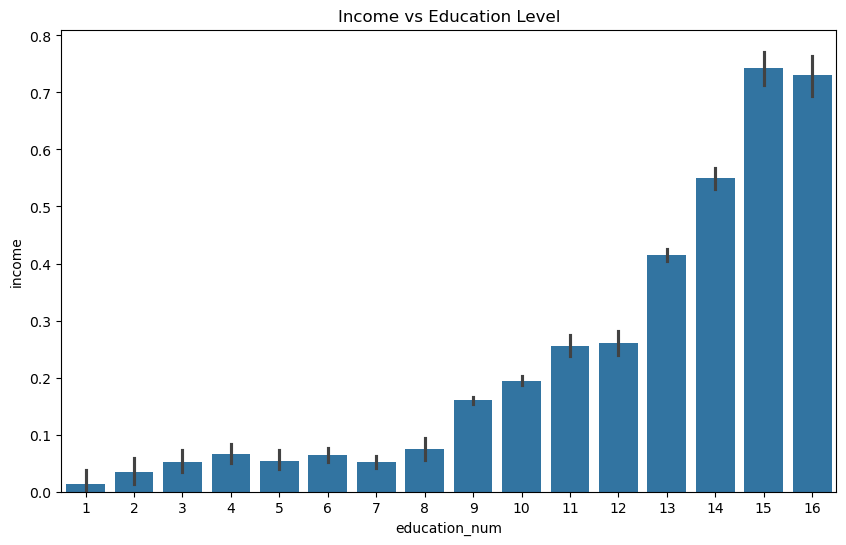

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='education_num', y='income', data=adult)
plt.title('Income vs Education Level')

### 3.2 Age vs Income
A box plot willshow how income varies with age.

Text(0.5, 1.0, 'Income by Age Group')

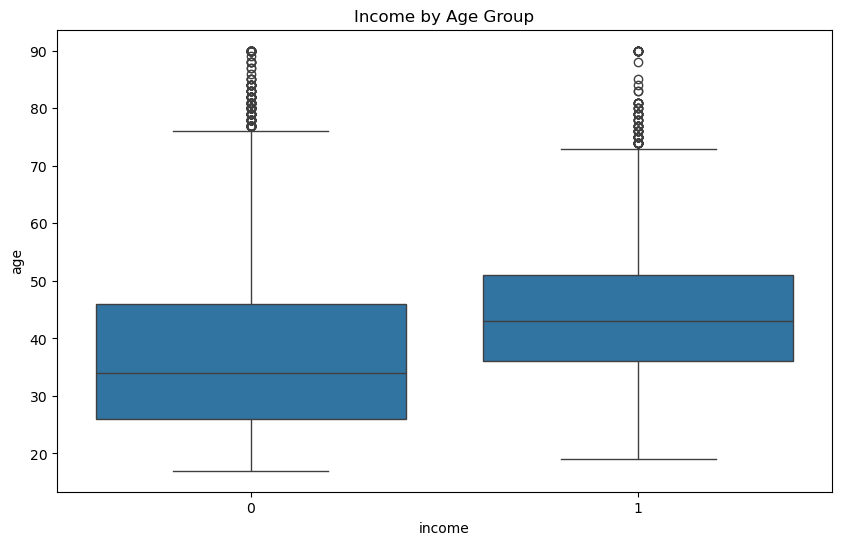

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='age', data=adult)
plt.title('Income by Age Group')

### 3.3 Correlation Heatmap

Let's plot a heatmap to identify how strongly different features correlate with income.

In [16]:
# Find correlations with income
corr_with_income = adult.corr()['income'].sort_values(ascending=False)

# Display the top 10 features
top_10_features = corr_with_income[1:11]
top_10_features

marital_status_Married-civ-spouse    0.445674
education_num                        0.332845
age                                  0.231986
hours_per_week                       0.227527
capital_gain                         0.222509
sex_Male                             0.215325
occupation_Exec-managerial           0.210287
occupation_Prof-specialty            0.186280
education_Bachelors                  0.179740
education_Masters                    0.172563
Name: income, dtype: float64

Text(0.5, 1.0, 'Top 10 Features Correlated with Income')

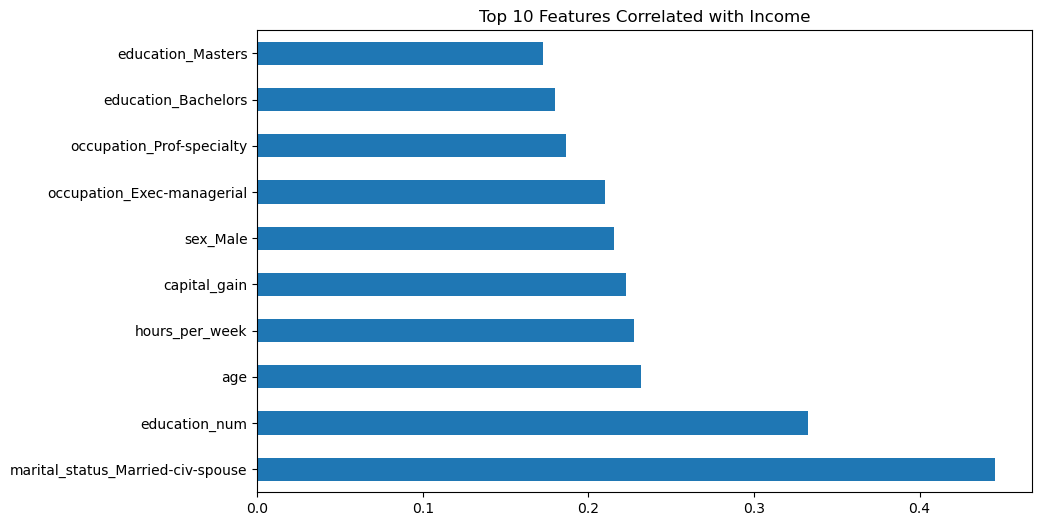

In [17]:
# Plot top 10 features as a bar chart
plt.figure(figsize=(10, 6))
top_10_features.plot(kind='barh')
plt.title('Top 10 Features Correlated with Income')

## 4. Modeling

### 4.1 Train-Test Split

Before building a model, we will split the data into training and test sets.

In [18]:
X = adult.drop('income', axis=1)  # Features
y = adult['income']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 4.2 Logistic Regression

Since our target variable is binary (income > 50K or <= 50K), we can use logistic regression. Logistic regression is sensitive to large differences in magnitude between features, so we also will scale our features using `StandardScaler` from `sklearn` before fitting the model.

In [19]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model on the scaled data
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
classification_report(y_test, y_pred)

Accuracy: 0.8477637012668859


'              precision    recall  f1-score   support\n\n           0       0.87      0.93      0.90     10733\n           1       0.75      0.59      0.66      3554\n\n    accuracy                           0.85     14287\n   macro avg       0.81      0.76      0.78     14287\nweighted avg       0.84      0.85      0.84     14287\n'

### 4.3 Feature Importance

We'd like to see which factors are most important in predicting income, so we'll check the coefficients from the logistic regression.

Text(0.5, 1.0, 'Top 10 Features Impacting Income')

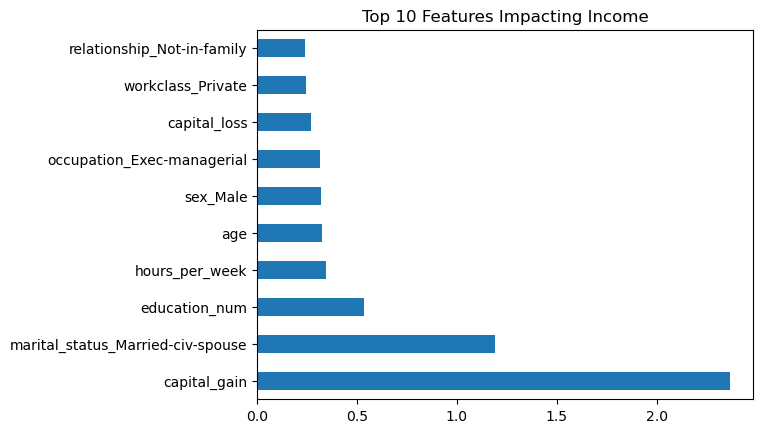

In [20]:
importance = model.coef_[0]
feature_importance = pd.Series(importance, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Features Impacting Income')

### 5. Interpret the Results